In [25]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns; 

## 6-1 iris Clustering (KNN)

In [5]:
iris = pd.read_csv('iris.csv')
iris.head(15)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
iris.isnull().sum() # null 값 확인 

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [7]:
iris.describe() #해당 데이터의 기초통계 확인

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris.skew()   #각 변수들의 skewness 확인. 

sepal length    0.314911
sepal width     0.334053
petal length   -0.274464
petal width    -0.104997
dtype: float64

In [9]:
iris.corr() #각 변수간 상관관계 파악하기. 각 변수들 가운데 어떤 것을 남기고 어떤 것을 지울 것인지?

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


In [237]:
X = iris.drop(['class'],1).values
y = iris['class'].values

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

[K=3]accuracy: 0.9333333333333333


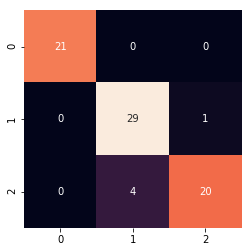

In [44]:
from sklearn.neighbors import KNeighborsClassifier  
KNN_3 = KNeighborsClassifier(n_neighbors=3)  
KNN_3.fit(X_train, y_train)  
y_pred = KNN_3.predict(X_test)
print("[K=3]accuracy:",KNN_3.score(X_test,y_test))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False)

In [189]:
pred_val = np.hstack((X_test,y_pred.reshape(-1,1))) ##X_test랑 y_pred array 합쳐주기

# pred_val + 실제 real class 값 합쳐주고 dataframe으로 만들기
pred_val2 = pd.DataFrame(np.hstack((pred_val,y_test.reshape(-1,1))),columns=['sepal length','sepal width','petal length','petal width','pred','rclass'])

In [239]:
pred_val2

,sepal length,sepal width,petal length,petal width,pred,rclass
0,5.8,2.8,5.1,2.4,Iris-virginica,Iris-virginica
1,6,2.2,4,1,Iris-versicolor,Iris-versicolor
2,5.5,4.2,1.4,0.2,Iris-setosa,Iris-setosa
3,7.3,2.9,6.3,1.8,Iris-virginica,Iris-virginica
4,5,3.4,1.5,0.2,Iris-setosa,Iris-setosa
5,6.3,3.3,6,2.5,Iris-virginica,Iris-virginica
6,5,3.5,1.3,0.3,Iris-setosa,Iris-setosa
7,6.7,3.1,4.7,1.5,Iris-versicolor,Iris-versicolor
8,6.8,2.8,4.8,1.4,Iris-versicolor,Iris-versicolor
9,6.1,2.8,4,1.3,Iris-versicolor,Iris-versicolor


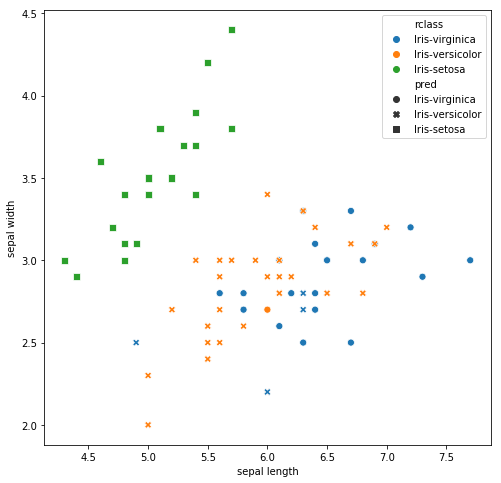

In [188]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
sns.scatterplot(x=pred_val2['sepal length'], 
                y=pred_val2['sepal width'],
                hue='rclass', # different colors by group
                style='pred',
                s=50, data=pred_val2)
plt.show()

[K=5]accuracy: 0.96


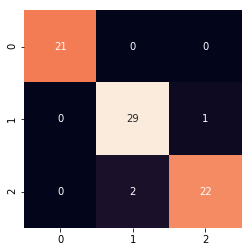

In [190]:
# K=5인 경우

KNN_5 = KNeighborsClassifier(n_neighbors=5)  
KNN_5.fit(X_train, y_train) 
y_pred = KNN_5.predict(X_test)
print("[K=5]accuracy:",KNN_5.score(X_test,y_test))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False)

In [191]:
pred_val = np.hstack((X_test,y_pred.reshape(-1,1))) ##X_test랑 y_pred array 합쳐주기

# pred_val + 실제 real class 값 합쳐주고 dataframe으로 만들기
pred_val2 = pd.DataFrame(np.hstack((pred_val,y_test.reshape(-1,1))),columns=['sepal length','sepal width','petal length','petal width','pred','rclass'])

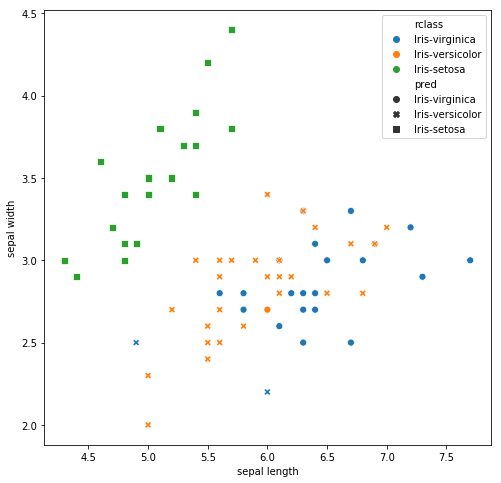

In [192]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=pred_val2['sepal length'], 
                y=pred_val2['sepal width'],
                hue='rclass', # different colors by group
                style='pred',
                s=50, data=pred_val2)
plt.show()

[K=7]accuracy: 0.96


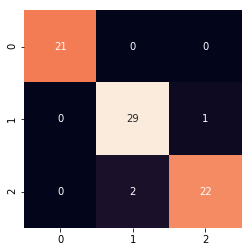

In [193]:
# K=7인 경우

KNN_7 = KNeighborsClassifier(n_neighbors=7)  
KNN_7.fit(X_train, y_train) 
y_pred = KNN_7.predict(X_test)
print("[K=7]accuracy:",KNN_7.score(X_test,y_test))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False)

In [194]:
pred_val = np.hstack((X_test,y_pred.reshape(-1,1))) ##X_test랑 y_pred array 합쳐주기

# pred_val + 실제 real class 값 합쳐주고 dataframe으로 만들기
pred_val2 = pd.DataFrame(np.hstack((pred_val,y_test.reshape(-1,1))),columns=['sepal length','sepal width','petal length','petal width','pred','rclass'])

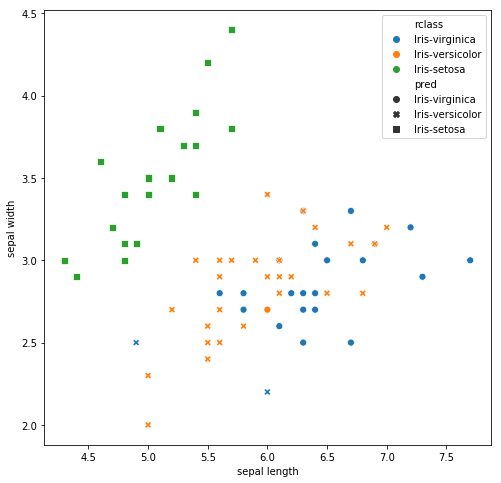

In [196]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=pred_val2['sepal length'], 
                y=pred_val2['sepal width'],
                hue='rclass', # different colors by group
                style='pred', #different shapes by group
                s=50, data=pred_val2)
plt.show()

## 6-1(A) iris Clustering (KNN) – k optimization

In [220]:
from sklearn.model_selection import KFold 
cv = KFold(n_splits=5)
scores = np.zeros(5)

In [217]:
for i in range(10):
    print("============== K =",i+1,"=============")
    KNN_model = KNeighborsClassifier(n_neighbors=i+1)
    KNN_model.fit(X_train, y_train) 
    y_pred = KNN_model.predict(X_test)
    print("accuracy:",KNN_model.score(X_test,y_test))

============== K = 1 =============
accuracy: 0.9066666666666666
============== K = 2 =============
accuracy: 0.8933333333333333
============== K = 3 =============
accuracy: 0.9333333333333333
============== K = 4 =============
accuracy: 0.92
============== K = 5 =============
accuracy: 0.96
============== K = 6 =============
accuracy: 0.9333333333333333
============== K = 7 =============
accuracy: 0.96
============== K = 8 =============
accuracy: 0.9466666666666667
============== K = 9 =============
accuracy: 0.9733333333333334
============== K = 10 =============
accuracy: 0.9466666666666667


In [235]:
## K=9일때 성능 가장 좋음.
KNN_model = KNeighborsClassifier(n_neighbors=9)

for i,(train_index, test_index) in enumerate(cv.split(X,y)):  # 들어오는 데이터에서 split 하는 index 얘기해줌. 
    
    X_train,X_test = X[train_index],X[test_index]
    y_train,y_test = y[train_index],y[test_index]

    KNN_model.fit(X_train,y_train)
    pred = KNN_model.predict(X_test)
    acc = accuracy_score(y_test,pred)
    mat = confusion_matrix(y_test,pred) #true , pred 
    print("=========",i,"번째 fold ===========")
    print("confusion matrix:",mat)
    print("accuracy:",acc)
    scores[i] = acc

print("******************************************")
print("평균 정확도: ",scores.mean())
print("정확도 표준편차: ",scores.std())

========= 0 번째 fold ===========
confusion matrix: [[30]]
accuracy: 1.0
========= 1 번째 fold ===========
confusion matrix: [[20  0]
 [ 0 10]]
accuracy: 1.0
========= 2 번째 fold ===========
confusion matrix: [[26  4]
 [ 0  0]]
accuracy: 0.8666666666666667
========= 3 번째 fold ===========
confusion matrix: [[10  0]
 [ 1 19]]
accuracy: 0.9666666666666667
========= 4 번째 fold ===========
confusion matrix: [[ 0  0]
 [ 7 23]]
accuracy: 0.7666666666666667
******************************************
평균 정확도:  0.9200000000000002
정확도 표준편차:  0.09092121131323902
